#Imagine you want to predict how much money someone will make in a year based on two things: 
#how much work experience they have and how well they did in school. We call these two things 'work experience' and 'CGPA'.
#To do this, we first gather data about many people who have different amounts of work experience and CGPA scores,
#as well as how much money they make in a year.

#Then, we split this data into two groups: one group to teach our computer how to make predictions 
#(we call this the 'training' group) and another group to test how good our predictions are (we call this the 'testing' group).

#Next, we use a special tool called 'Linear Regression' to learn from the training data.
#This tool looks at the relationship between work experience, CGPA, and annual package in the training group 
#to figure out how to make predictions.

#Once the tool has learned, we test it on the testing group. We give it the work experience and CGPA of people
#in the testing group and ask it to predict how much money they make in a year.

#Finally, we compare the predictions the tool made to the actual amounts of money people in the testing group make. 
#We use a special number called 'Mean Squared Error' to see how close the predictions are to the actual amounts. 
#The lower the mean squared error, the better our predictions are.
#And that's how we predict annual package using work experience and CGPA!"







In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
new_df = pd.read_csv("multi.csv")

In [30]:
new_df

,CGPA,Work Experience,Package (per annum)
0,7.89,2.0,600000.0
1,8.32,3.0,1700000.0
2,6.75,1.0,1900000.0
3,9.21,4.0,1100000.0
4,7.41,2.0,2300000.0
5,8.65,3.0,2400000.0
6,9.76,5.0,2700000.0
7,8.94,4.0,2000000.0
8,9.58,6.0,2900000.0
9,9.12,3.0,2200000.0


In [3]:
new_df['CGPA'] = new_df['CGPA'].astype('float32')
new_df['Work Experience'] = new_df['Work Experience'].astype('float32')
new_df['Package (per annum)'] = new_df['Package (per annum)'].astype('float32')
print(new_df.dtypes)


CGPA                   float32
Work Experience        float32
Package (per annum)    float32
dtype: object


In [11]:
x = new_df.drop(columns=['Package (per annum)'])
y = new_df['Package (per annum)']  

In [5]:
new_df.isnull().sum()

CGPA                   0
Work Experience        0
Package (per annum)    0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
c = lr.intercept_

In [19]:
c

4434340.0

In [21]:
m = lr.coef_

In [22]:
m

array([-479732.22,  477754.88], dtype=float32)

In [23]:
y_pred_train = lr.predict(x_train)

In [24]:
y_pred_train

array([1673902.5, 2705034.8, 1876232.5, 2056553.5, 1492446.5, 1927025.5,
       1604762.5, 1717921. , 2046116.2], dtype=float32)

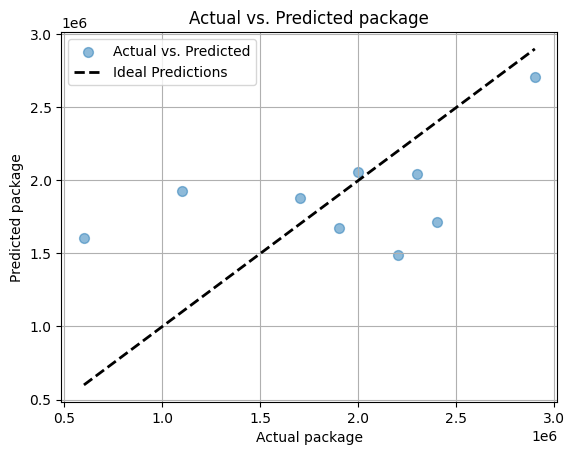

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train, alpha=0.5, s=50, label='Actual vs. Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Ideal Predictions')
plt.title('Actual vs. Predicted package')
plt.xlabel('Actual package')
plt.ylabel('Predicted package')
plt.legend()
plt.grid(True)
plt.show()
